# Unit 5 - Financial Planning


In [8]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("keys.env")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
portfolio_shares = [1.2,5.3]
portfolio_coins = ["BTC","ETH"]
coins_code = [1,1027]

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [12]:
# Fetch current BTC price
response_btc = requests.get(btc_url).json()

# Fetch current ETH price
response_eth = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc = portfolio_shares[0]
my_eth = portfolio_shares[1]

response_btc["data"]["1"]["quotes"]["USD"]["price"]
btc_quote = response_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_quote

response_eth["data"]["1027"]["quotes"]["USD"]["price"]
eth_quote = response_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_quote

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71095.20
The current value of your 5.3 ETH is $11136.09


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set Alpaca API key and secret
# Create the Alpaca API object
load_dotenv("keys.env")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Current amount of shares
# Format current date as ISO format
# Set the tickers
# Set timeframe to '1D' for Alpaca API
# Get current closing prices for SPY and AGG
# Preview DataFrame

today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
tickers = ["SPY", "AGG"]
timeframe = "1D"
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio.head()

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [16]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [18]:
# Compute the current value of shares
my_agg = 200
my_spy = 50

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15944.50
The current value of your 200 AGG shares is $23731.00


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({"crypto": [(my_eth_value+my_btc_value)],
                          "shares": [(my_spy_value+my_agg_value)]})

df_savings = df_savings.T
df_savings.columns = ["amount"]
# Display savings DataFrame
display(df_savings)

,amount
crypto,82231.295
shares,39675.500


<AxesSubplot:ylabel='amount'>

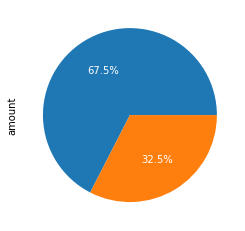

In [27]:
# Plot savings pie chart
df_savings["amount"].plot.pie(autopct='%1.1f%%', textprops={'color':"w"})

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough savings to cover an emergency")
elif (total_savings == emergency_fund):
    print("Congratulations! Your savings are enought o cover your emergency")
else:
    dollars_to_save = (emergency_fund - total_savings)
    print(f"You are ${dollars_to_save} away from reaching the goal")

Congratulations! You have enough savings to cover an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [30]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [36]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_stock_data[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.dropna(inplace=True)
df_closing_prices

,SPY,AGG
2016-08-18,218.87,112.705
2016-08-19,218.57,112.490
2016-08-22,218.50,112.650
2016-08-23,218.94,112.690
2016-08-24,217.88,112.660
...,...,...
2020-08-03,328.76,119.400
2020-08-04,330.03,119.630
2020-08-05,332.06,119.400
2020-08-06,334.31,119.580


In [37]:
df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns.head()

,SPY,AGG
2016-08-19,-0.001371,-0.001908
2016-08-22,-0.000320,0.001422
2016-08-23,0.002014,0.000355
2016-08-24,-0.004842,-0.000266
2016-08-25,-0.001147,-0.001154


<AxesSubplot:ylabel='Density'>

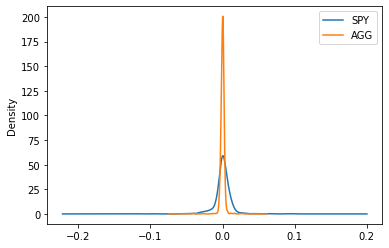

In [38]:
df_daily_returns.plot.density()

In [56]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [57]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
time                                              
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [58]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995412,1.001138,0.996772,0.997819,0.998967,0.999925,1.001742,1.000953,1.001609,0.996007,...,1.002703,1.000626,0.998168,0.997188,1.001218,0.998773,0.994765,0.998775,1.002853,0.997093
2,0.992395,0.999191,0.995745,0.999293,1.002358,0.999035,1.003851,1.001284,1.006359,0.996949,...,1.008206,1.002757,0.996171,0.998108,1.001259,0.995014,1.000448,0.997232,0.998160,0.998410
3,0.989532,0.998686,0.996344,0.993966,1.007404,0.996031,1.004510,0.999492,1.010634,0.993364,...,1.018467,1.007216,0.997669,0.998938,0.996776,0.989463,0.998714,0.999714,1.000488,1.004549
4,0.990897,0.996489,0.993218,1.001867,1.002541,0.993744,1.007042,1.002450,1.011309,0.994348,...,1.020454,1.008030,0.990791,1.001693,0.997563,0.987646,1.003647,0.995565,0.997549,1.004963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.884674,3.443813,4.261564,2.463153,2.433118,2.374058,2.332817,5.640433,4.087215,2.833053,...,1.349180,2.757184,3.585744,3.807477,2.078371,3.644956,2.248838,3.205777,2.268343,2.183120
7557,3.905932,3.445426,4.259286,2.457371,2.419086,2.381509,2.329674,5.645995,4.101040,2.836737,...,1.346631,2.763183,3.589955,3.818039,2.067400,3.633828,2.259542,3.224745,2.272586,2.187074
7558,3.929004,3.451191,4.260670,2.460159,2.425413,2.391702,2.331716,5.638408,4.097426,2.832061,...,1.333897,2.763700,3.591203,3.824865,2.065394,3.647430,2.278477,3.249973,2.286505,2.199533
7559,3.904574,3.437258,4.256809,2.473310,2.417670,2.389947,2.326253,5.646957,4.126629,2.820252,...,1.334628,2.766805,3.607913,3.806473,2.055215,3.650852,2.277261,3.227704,2.270735,2.194175


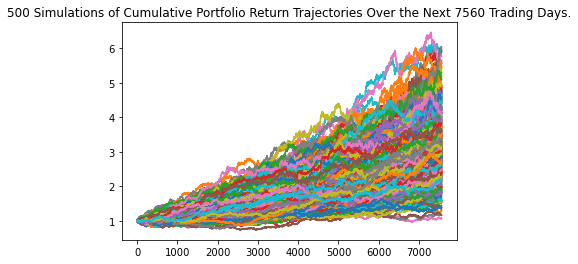

In [59]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

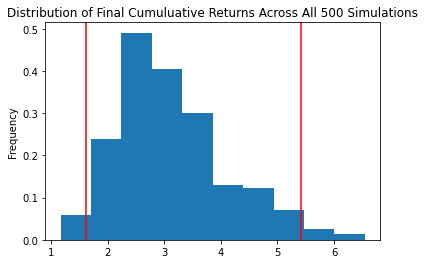

In [60]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.140478
std               0.988663
min               1.164602
25%               2.436412
50%               2.984397
75%               3.662430
max               6.546039
95% CI Lower      1.611199
95% CI Upper      5.411417
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [62]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32223.98 and $108228.35


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $48335.97 and $162342.52


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [66]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006418,0.995331,0.998861,1.007217,0.995022,1.005985,1.004735,0.999456,1.007157,1.003383,...,0.999445,1.001578,0.995412,1.005042,0.999717,0.996186,1.004400,1.000807,1.004798,1.001677
2,1.009281,0.990408,1.003960,1.010123,0.995502,1.010602,1.008216,0.992496,1.011667,1.007080,...,1.003251,0.997640,0.998802,1.002227,0.999699,0.992658,1.004347,1.003416,0.999040,1.001601
3,1.008858,0.990131,1.006760,1.014309,0.991236,0.999832,1.016256,0.988591,1.015202,1.009257,...,1.000502,0.993142,1.000149,1.001496,1.000444,0.990112,1.008485,1.005434,0.995841,0.998609
4,1.011393,0.990630,1.005342,1.016249,0.994217,1.000571,1.008257,0.990255,1.017640,1.008304,...,0.998240,0.994831,0.997992,0.999478,1.002560,0.993014,1.007006,1.013749,0.994659,1.000617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.170456,1.545901,1.370272,1.165468,1.300299,0.999579,0.968593,1.317850,1.314037,1.383196,...,1.200570,1.244262,1.180954,0.994774,1.184694,1.509642,1.007326,1.171410,1.231253,1.153983
1257,1.166825,1.549065,1.375429,1.162271,1.302398,1.000839,0.967674,1.314992,1.317761,1.383111,...,1.200461,1.237067,1.178179,0.999657,1.190884,1.511740,1.007934,1.174898,1.226086,1.152204
1258,1.166400,1.549332,1.369537,1.161092,1.303928,1.005820,0.971148,1.312662,1.317892,1.381598,...,1.190816,1.232057,1.181593,1.000344,1.193740,1.518650,1.012435,1.170108,1.225407,1.156964
1259,1.164861,1.545111,1.380358,1.160712,1.307606,1.004727,0.977089,1.308525,1.320668,1.382070,...,1.187614,1.229484,1.179172,1.004540,1.195350,1.509993,1.015014,1.176810,1.225281,1.166093


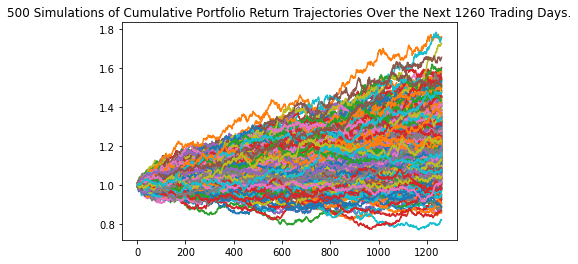

In [67]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches="tight")

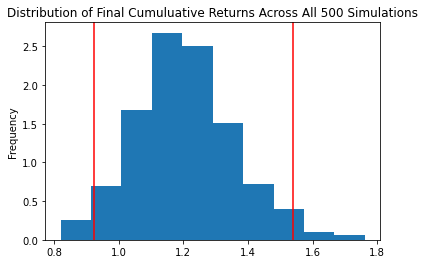

In [68]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.207618
std               0.154541
min               0.820529
25%               1.104851
50%               1.198444
75%               1.302133
max               1.761709
95% CI Lower      0.925238
95% CI Upper      1.540432
Name: 1260, dtype: float64


In [70]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18504.76 and $30808.63


### Ten Years Retirement Option

In [71]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [72]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996441,0.998257,0.998752,0.998563,0.998831,0.999962,1.007229,0.998519,1.000759,1.006072,...,1.002235,1.004328,0.999097,1.000731,0.999311,1.003305,1.000884,1.000608,0.998123,1.003645
2,0.997700,0.996016,0.999021,1.001981,0.995737,1.003418,1.007621,0.993948,1.001769,1.003417,...,1.002717,1.009692,1.000364,1.004745,0.996504,1.004156,1.000566,1.002244,0.999714,1.003747
3,0.999415,0.993323,1.002269,1.000461,0.992739,1.004730,1.011073,0.996000,0.999548,1.006863,...,1.004021,1.005023,0.998021,1.002620,0.999990,1.002492,1.000259,1.010701,0.997131,1.004262
4,0.989669,0.995951,1.002917,1.007004,0.985599,1.003714,1.009767,0.998083,1.000510,1.006048,...,1.001857,1.009977,0.995402,1.008906,1.001822,0.993775,0.993115,1.007809,1.001907,1.007593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.501815,1.786368,1.138658,1.047191,1.214525,1.474262,1.399264,1.538400,1.168134,1.248157,...,1.548306,2.011259,1.611247,1.269027,1.700538,1.284139,1.938583,1.577802,1.469560,1.551789
2517,1.515732,1.781113,1.140329,1.041099,1.221434,1.472472,1.395944,1.535771,1.180596,1.253748,...,1.547244,2.013783,1.627279,1.271974,1.696993,1.289827,1.929628,1.586333,1.470529,1.560897
2518,1.513927,1.778267,1.141421,1.042261,1.220953,1.469332,1.385171,1.540046,1.182941,1.259022,...,1.547439,2.011977,1.626463,1.265469,1.678727,1.281563,1.920892,1.579295,1.471223,1.560092
2519,1.522647,1.780740,1.141703,1.044006,1.224297,1.469524,1.388112,1.534180,1.182886,1.251987,...,1.537669,2.024427,1.628504,1.266281,1.682304,1.282301,1.933238,1.574193,1.485476,1.565518


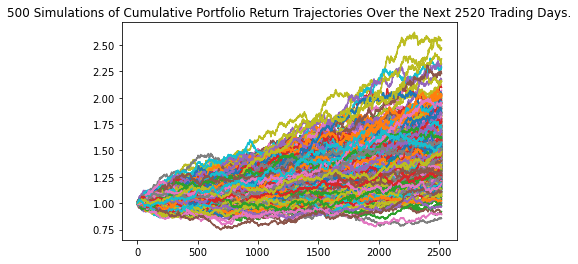

In [73]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

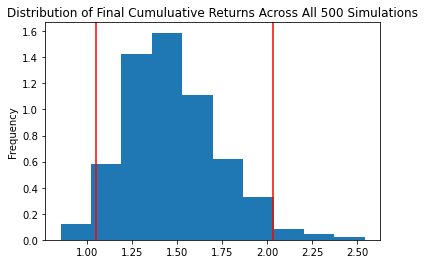

In [74]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.481540
std               0.263172
min               0.855524
25%               1.300443
50%               1.465643
75%               1.634721
max               2.542130
95% CI Lower      1.054334
95% CI Upper      2.034399
Name: 2520, dtype: float64


In [76]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $21086.68 and $40687.98
